<a href="https://colab.research.google.com/github/CamelGoong/Python_Practicing/blob/main/%5BBoost%5D6_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EB%A5%BC_%ED%86%B5%ED%95%9C_%EC%9E%90%EB%8F%99%EC%B0%A8_%EC%97%B0%EB%B9%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 텐서플로를 통한 자동차 연비 예측하기
* 참고 : [자동차 연비 예측하기: 회귀  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/regression)

## 필요 도구 가져오기

In [1]:
# 데이터 분석을 위한 pandas, 시각화를 위한 seaborn 불러오기
import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [5]:
# 자동차연비 데이터셋인 mpg 데이터셋을 불러옵니다.
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 결측치 확인

In [4]:
# 결측치의 합계 구하기
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## 결측치 제거

In [8]:
# dropna로 결측치를 제거합니다.
df = df.dropna() # 꼭 다시 넣어주어야 함.
df.shape

(392, 9)

## 수치 데이터만 가져오기
* 머신러닝이나 딥러닝 모델은 내부에서 수치계산을 하기 때문에 **숫자**가 아닌 데이터를 넣어주면 모델이 학습과 예측을 할 수 없습니다.

In [10]:
# select_dtypes 를 통해 object 타입을 제외하고 가져옵니다.
df = df.select_dtypes(exclude = object) # origin하고 name column 제거
df.shape

(392, 7)

## 전체 데이터에 대한 기술 통계 확인

In [11]:
# describe 를 통해 기술 통계값을 확인합니다.
df.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 데이터셋 나누기

In [16]:
# 전체 데이터프레임에서 df, train, test를 분리합니다.
# train_dataset : 학습에 사용 (예: 기출문제)
# test_dataset : 실제 예측에 사용 (예 : 실전문제)
# 기출문제로 공부하고 실전 시험을 보는 과정과 유사합니다.

# 8:2의 비율로 분리
train_dataset = df.sample(frac = 0.8, random_state = 42) # frac은 train_dataset의 비율
train_dataset.shape

(314, 7)

In [17]:
test_dataset = df.drop(train_dataset.index) # 다시 df에서 test_dataset을 random하게 가져오면, train_dataset과 겹칠 수 있기 때문에, train_dataset에 해당되는 index의 data를 df에서 제거
test_dataset.shape

(78, 7)

In [18]:
# train_dataset, test_dataset 에서 label(정답) 값을 꺼내 label 을 따로 생성합니다.
# 문제에서 정답을 분리하는 과정입니다.
# train_labels : train_dataset(예: 기출문제) 에서 정답을 꺼내서 분리합니다.
# test_labels : test_labels(예: 실전문제) 에서 정답을 꺼내서 분리합니다.
train_labels = train_dataset.pop("mpg") # pop은 특정 column만 추출, mpg가 정답값
train_labels.shape


(314,)

In [19]:
test_labels = test_dataset.pop("mpg")
test_labels.shape

(78,)

In [21]:
train_dataset.shape, test_dataset.shape # 정답 column이 빠져서 하나씩 줄어듦

((314, 6), (78, 6))

In [22]:
train_labels.head(2)

79     26.0
276    21.6
Name: mpg, dtype: float64

## 딥러닝 모델 만들기
<img src="https://cs231n.github.io/assets/nn1/neural_net.jpeg" width="30%"> <img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

* 두 개의 완전 연결(densely connected) 은닉층으로 Sequential 모델을 만들겠습니다. 
* 출력 층은 하나의 연속적인 값을 반환합니다. 

In [25]:
# tensorflow 를 불러옵니다.
import tensorflow as tf
tf.__version__

'2.7.0'

### 딥러닝 층 구성

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = [6]),
    tf.keras.layers.Dense(64, activation = 'relu',),
    tf.keras.layers.Dense(64, activation = 'relu',),
    tf.keras.layers.Dense(1)
]
)

### 모델 컴파일

In [65]:
model.compile(loss = 'mse', metrics = ['mae', "mse"]) #  회귀에서는 주로 metric으로 mae와 mse를 사용.

### 만든 모델 확인하기

In [66]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                448       
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 모델로 학습하기

In [67]:
model.fit(train_dataset, train_labels, epochs = 100, verbose = 1)

Epoch 1/100
10/10 [==============================] - 1s 6ms/step - loss: 17986.4141 - mae: 60.0908 - mse: 17986.4141
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 347.5654 - mae: 16.2869 - mse: 347.5654
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 3666.8250 - mae: 43.7006 - mse: 3666.8250
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1327.0157 - mae: 27.4122 - mse: 1327.0157
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 3034.8594 - mae: 46.9294 - mse: 3034.8594
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 1246.2845 - mae: 30.0949 - mse: 1246.2845
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2587.3604 - mae: 45.5371 - mse: 2587.3604
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 2000.9401 - mae: 39.6885 - mse: 2000.9401
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 1395.41

## 딥러닝 모델로 평가하기

In [68]:
model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 108.1644 - mae: 9.2074 - mse: 108.1644


[108.16436004638672, 9.207356452941895, 108.16436004638672]

## 딥러닝 모델의 예측하기

In [69]:
predict_labels = model.predict(test_dataset).flatten() # 2차원 -> 1차원
predict_labels[:5]

array([ 7.2628136, -1.0734062, 20.359732 , 18.783413 , 10.218984 ],
      dtype=float32)

## 딥러닝 모델의 예측결과 평가하기

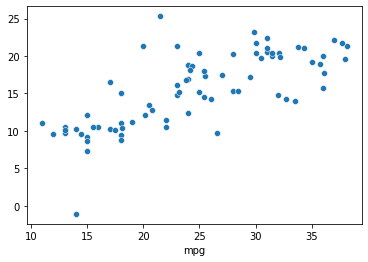

In [70]:
sns.scatterplot(x = test_labels, y = predict_labels)

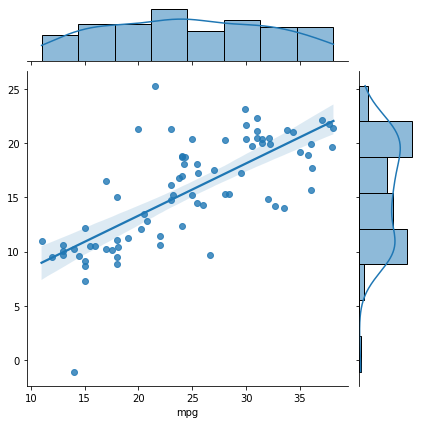

In [77]:
sns.jointplot(x = test_labels, y = predict_labels, kind = 'reg')